## **OKCupid Machine Learning Project**
## **================================**
This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

### **Project Objetives**
The goals of this project is to **scope, prepare and analyze the data**. The second goal is to **create ML model(s)** that can solve questions and predict outcomes. Depending on the results and resources available, the model could be tuned and optimised. 
- Load and check the data
- Exploratory data analysis
- Select the ML model
- Prepare the data  
- Build the model(s)
- Train and evaluate the model(s)
- Conclusions 
### **Dataset**

The dataset used in this project is from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles). The dataset contains information about 60,000 users and their responses to a set of questions. OkCupid is a mobile dating app. It sets itself apart from other dating apps by making use of a pre computed compatibility score, calculated by optional questions the users may choose to answer. In this dataset, there are 60k records containing structured information such as age, sex, orientation as well as text data from open ended descriptions in 30 columns.

##### The columns in the dataset include: 
- ``age:`` continuous variable of age of user
- ``body_type:`` categorical variable of body type of user
- ``diet:`` categorical variable of dietary information
- ``drinks:``  categorical variable of alcohol consumption
- ``drugs:`` categorical variable of drug usage
- ``education:`` categorical variable of educational attainment
- ``ethnicity:`` categorical variable of ethnic backgrounds
- ``height:`` continuous variable of height of user
- ``income:`` continuous variable of income of user
- ``job:`` categorical variable of employment description
- ``offspring:`` categorical variable of children status
- ``orientation:`` categorical variable of sexual orientation
- ``pets:`` categorical variable of pet preferences
- ``religion:`` categorical variable of religious background
- ``sex:`` categorical variable of gender
- ``sign:`` categorical variable of astrological symbol
- ``smokes:`` categorical variable of smoking consumption
- ``speaks:`` categorical variable of language spoken
- ``status:`` categorical variable of relationship status
- ``last_online:`` date variable of last login
##### And a set of open short-answer responses to :
- ``essay0:`` My self summary
- ``essay1:``  What I’m doing with my life
- ``essay2:`` I’m really good at
- ``essay3:`` The first thing people usually notice about me
- ``essay4:`` Favorite books, movies, show, music, and food
- ``essay5:`` The six things I could never do without
- ``essay6:`` I spend a lot of time thinking about
- ``essay7:`` On a typical Friday night I am
- ``essay8:`` The most private thing I am willing to admit
- ``essay9:`` You should message me if…

#### **1. Load and check the data**

In [29]:
# import libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

#set theme for the seaborn plots
#context is for the size of the plot
#style is for the background of the plot
#palette is for the color of the plot
#font is for the font of the plot
#font_scale is for the size of the font
#color_codes is for the color of the plot
sn.set_theme(context='notebook', style='darkgrid', palette='tab10', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [30]:
#load the data
profiles_data = pd.read_csv('profiles.csv')
profiles_df = pd.DataFrame(profiles_data)

display(profiles_df.info())
display(profiles_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

None

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54458,52374,50308,48470,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,NaN,12,18,6,3,32,54350,51516,48635,43533,...,199,15,3,15,45,2,48,5,7647,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,12,61,82,529,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **2. Exploratory Data Analysis**

In [31]:
# Create a Table of Frequency and Relative Frequency Function
def find_freq(column_name):
    # Create a Frequency Table by Calculating the Value Counts and Reset the Index
    frequency_table = column_name.value_counts(normalize = False).reset_index()
    # Sort the Values by the First Column
    frequency_table = frequency_table.sort_values(by = frequency_table.columns[0])
    ######
    # Create a Relative Frequency Table by Calculating the Value Counts and Reset the Index
    relative_frequency = column_name.value_counts(normalize = True).reset_index()
    # Sort the Values by the First Column
    relative_frequency = relative_frequency.sort_values(by = relative_frequency.columns[0])
    
    return frequency_table, relative_frequency

# Create a Bar Plot Function
def create_bar(table):
    # Create a Bar Plot of the Given Frequency Table
    plt.barh(table[table.columns[0]],
           table[table.columns[1]])
    
    # Create Labels for the Plot
    plt.title("Count of " + table.columns[0].title())
    plt.xlabel(table.columns[1].title())
    plt.ylabel(table.columns[0].title())
    
    plt.show()
    plt.close()
    
# Create a Pie Chart Function
def create_pie(table):
    # Create a Pie Chart of the Given Table
    plt.pie(table[table.columns[1]],
           labels = table[table.columns[0]])
    
    # Equal Aspect Ratio to Make the Pie Chart a Circle
    plt.axis("equal")
    
    # Create Labels
    plt.title("Pie Chart of " + table.columns[0].title())
    
    # Show and Close the Plot
    plt.show() 
    plt.close()

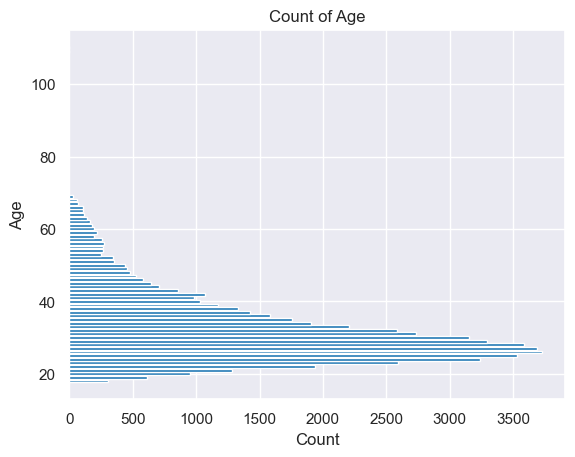

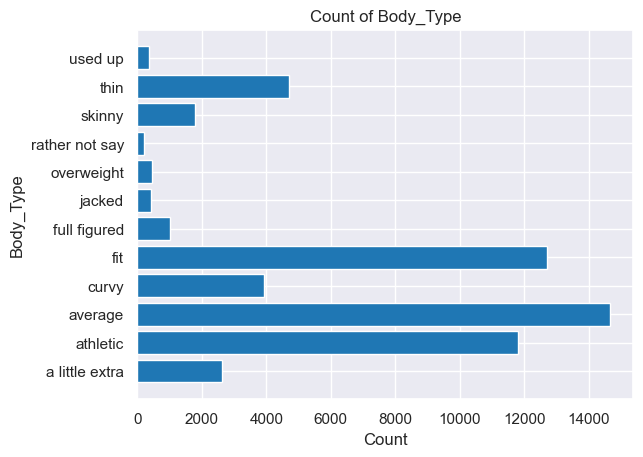

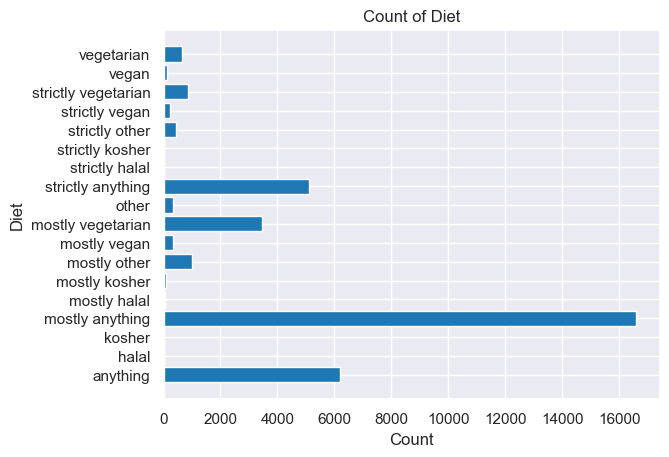

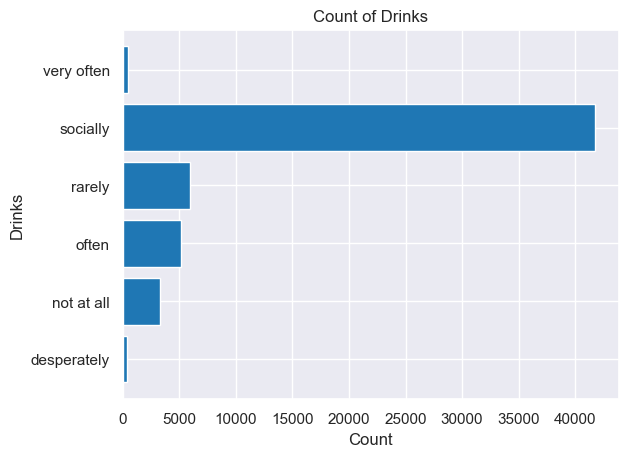

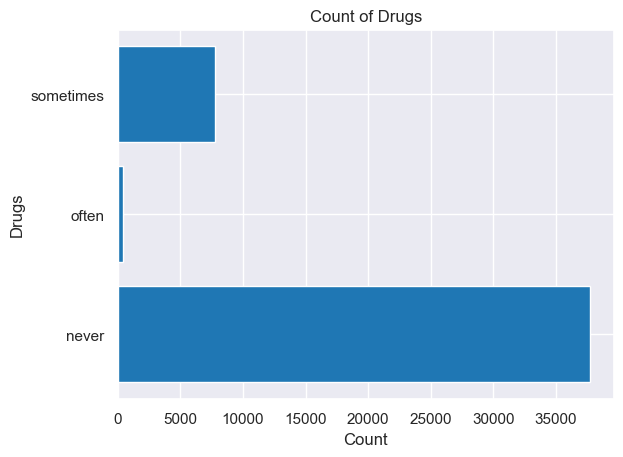

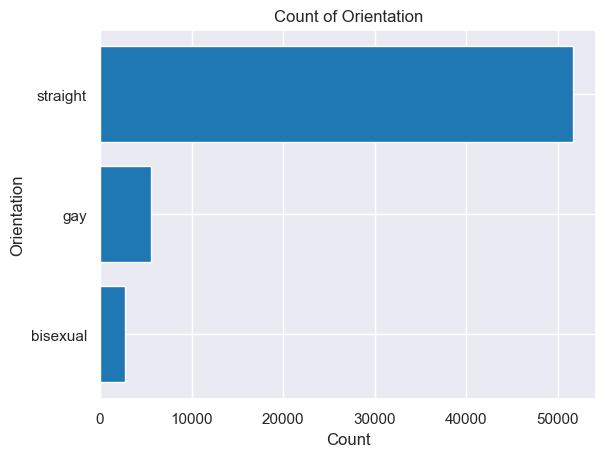

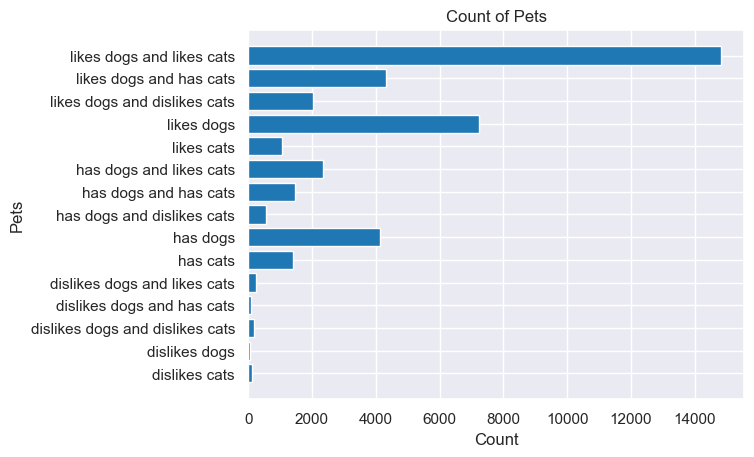

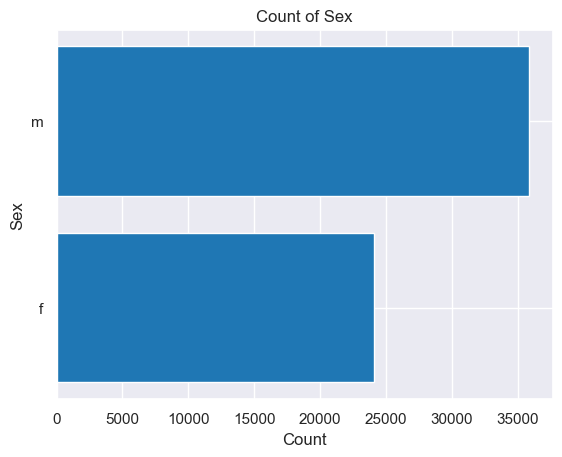

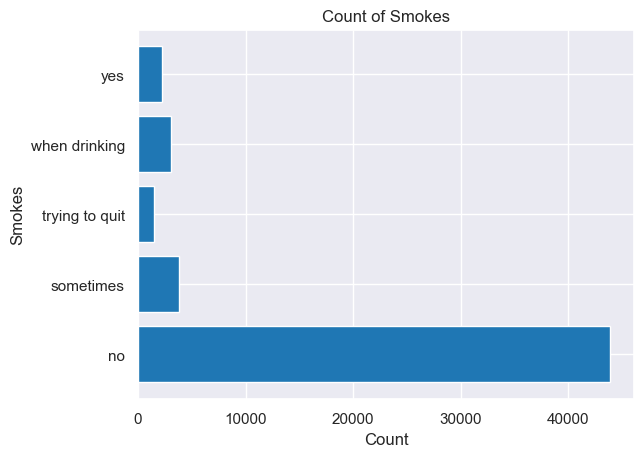

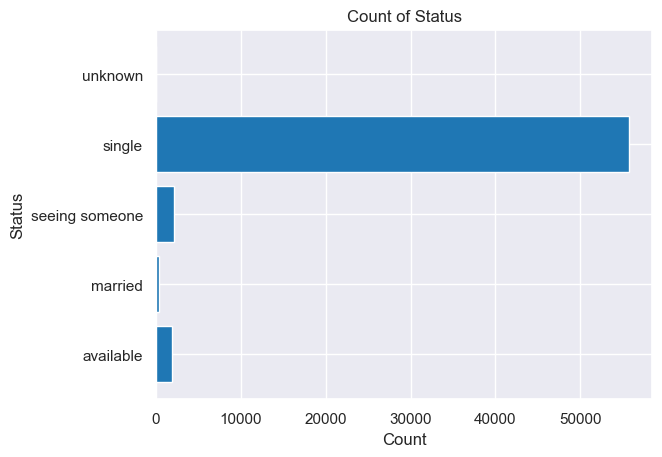

In [32]:
# Columns to Explore
columns = ["age", "body_type", "diet", "drinks", "drugs", "orientation", "pets", "sex", "smokes", "status"]

# There are some columns that don't make sense to put on this type of bar chart, ie: Location, Sign, etc.
# Data still needs cleaning. For example, 
# Body_Type has categories that aren't very specific, are arbitrary, or confusing? 
# I'm not really sure what the difference is between thin and skinny 
# or athletic, fit, and jacked. There is a lot of nuance.
# Diet has specific and strictly specific categories that could be condensed or combined
# Pets has so many categories that could probably be condensed or combined

# Examples of the Plot Functions
for name in columns:
    freq_table, rel_freq_table = find_freq(profiles_df[name])
    create_bar(freq_table)

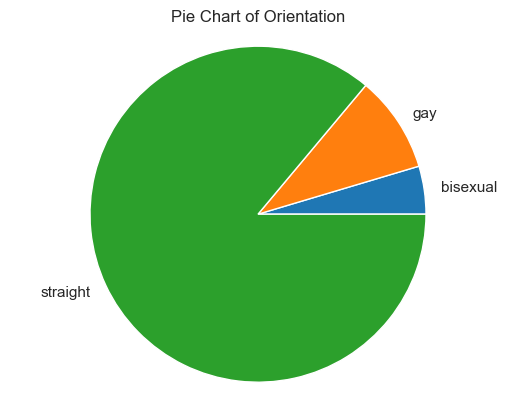

In [33]:
# Example of Pie Chart Function
freq_table, rel_freq_table = find_freq(profiles_df["orientation"]) # Change the value inside the " "
create_pie(freq_table)

#### **3. Select the ML model**

#### **4. Random Forest Model**

In [34]:
# Preparing the features and labels

# drop the NaN values in the columns that will be used as features
profiles_df.dropna(subset=['age', 'height', 'income','drinks', 'smokes','orientation', 'body_type', 'diet'],inplace=True)

# define features and labels
X = profiles_df.drop('status', axis=1)
y = profiles_df['status']

# define the columns transformer as a touple ct([(x,y)])
# age, height and income are standarized using the StandardScaler 
# drinks, smokes, orientation, body_type and diet are One_hot encoded
ct = ColumnTransformer([("Standarized", StandardScaler(),['age', 'height', 'income']),
                       ("One_Hot_Encoded", OneHotEncoder(sparse_output=False),['drinks', 'smokes','orientation', 'body_type', 'diet'])])

# split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X.shape)
print(y.shape)

# transform the test and train data using the Column Transformer composer
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)
print(X_train_trans.shape)
display(ct.get_feature_names_out())

(31518, 30)
(31518,)
(25214, 47)


array(['Standarized__age', 'Standarized__height', 'Standarized__income',
       'One_Hot_Encoded__drinks_desperately',
       'One_Hot_Encoded__drinks_not at all',
       'One_Hot_Encoded__drinks_often', 'One_Hot_Encoded__drinks_rarely',
       'One_Hot_Encoded__drinks_socially',
       'One_Hot_Encoded__drinks_very often', 'One_Hot_Encoded__smokes_no',
       'One_Hot_Encoded__smokes_sometimes',
       'One_Hot_Encoded__smokes_trying to quit',
       'One_Hot_Encoded__smokes_when drinking',
       'One_Hot_Encoded__smokes_yes',
       'One_Hot_Encoded__orientation_bisexual',
       'One_Hot_Encoded__orientation_gay',
       'One_Hot_Encoded__orientation_straight',
       'One_Hot_Encoded__body_type_a little extra',
       'One_Hot_Encoded__body_type_athletic',
       'One_Hot_Encoded__body_type_average',
       'One_Hot_Encoded__body_type_curvy',
       'One_Hot_Encoded__body_type_fit',
       'One_Hot_Encoded__body_type_full figured',
       'One_Hot_Encoded__body_type_jacked',
     

The model performance is: 0.9346446700507615
                precision    recall  f1-score   support

     available       0.07      0.01      0.02       179
       married       0.00      0.00      0.00        30
seeing someone       0.04      0.01      0.01       162
        single       0.94      0.99      0.97      5933

      accuracy                           0.93      6304
     macro avg       0.26      0.25      0.25      6304
  weighted avg       0.89      0.93      0.91      6304



c:\Users\cuate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cuate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cuate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


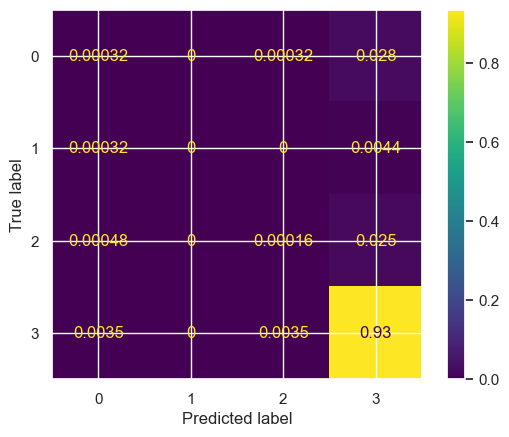

In [35]:
# Random Forest classification

# train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_trans, y_train)
y_pred = rf.predict(X_test_trans)

# model performance
print(f'The model performance is: {rf.score(X_test_trans, y_test)}')
print(classification_report(y_test, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
cm_display = ConfusionMatrixDisplay(cm).plot()

The top 5 features of the best random forest model are:


,feature,importance
0,Standarized__age,0.307405
1,Standarized__height,0.252796
2,Standarized__income,0.078632
14,One_Hot_Encoded__orientation_bisexual,0.022752
19,One_Hot_Encoded__body_type_average,0.017824


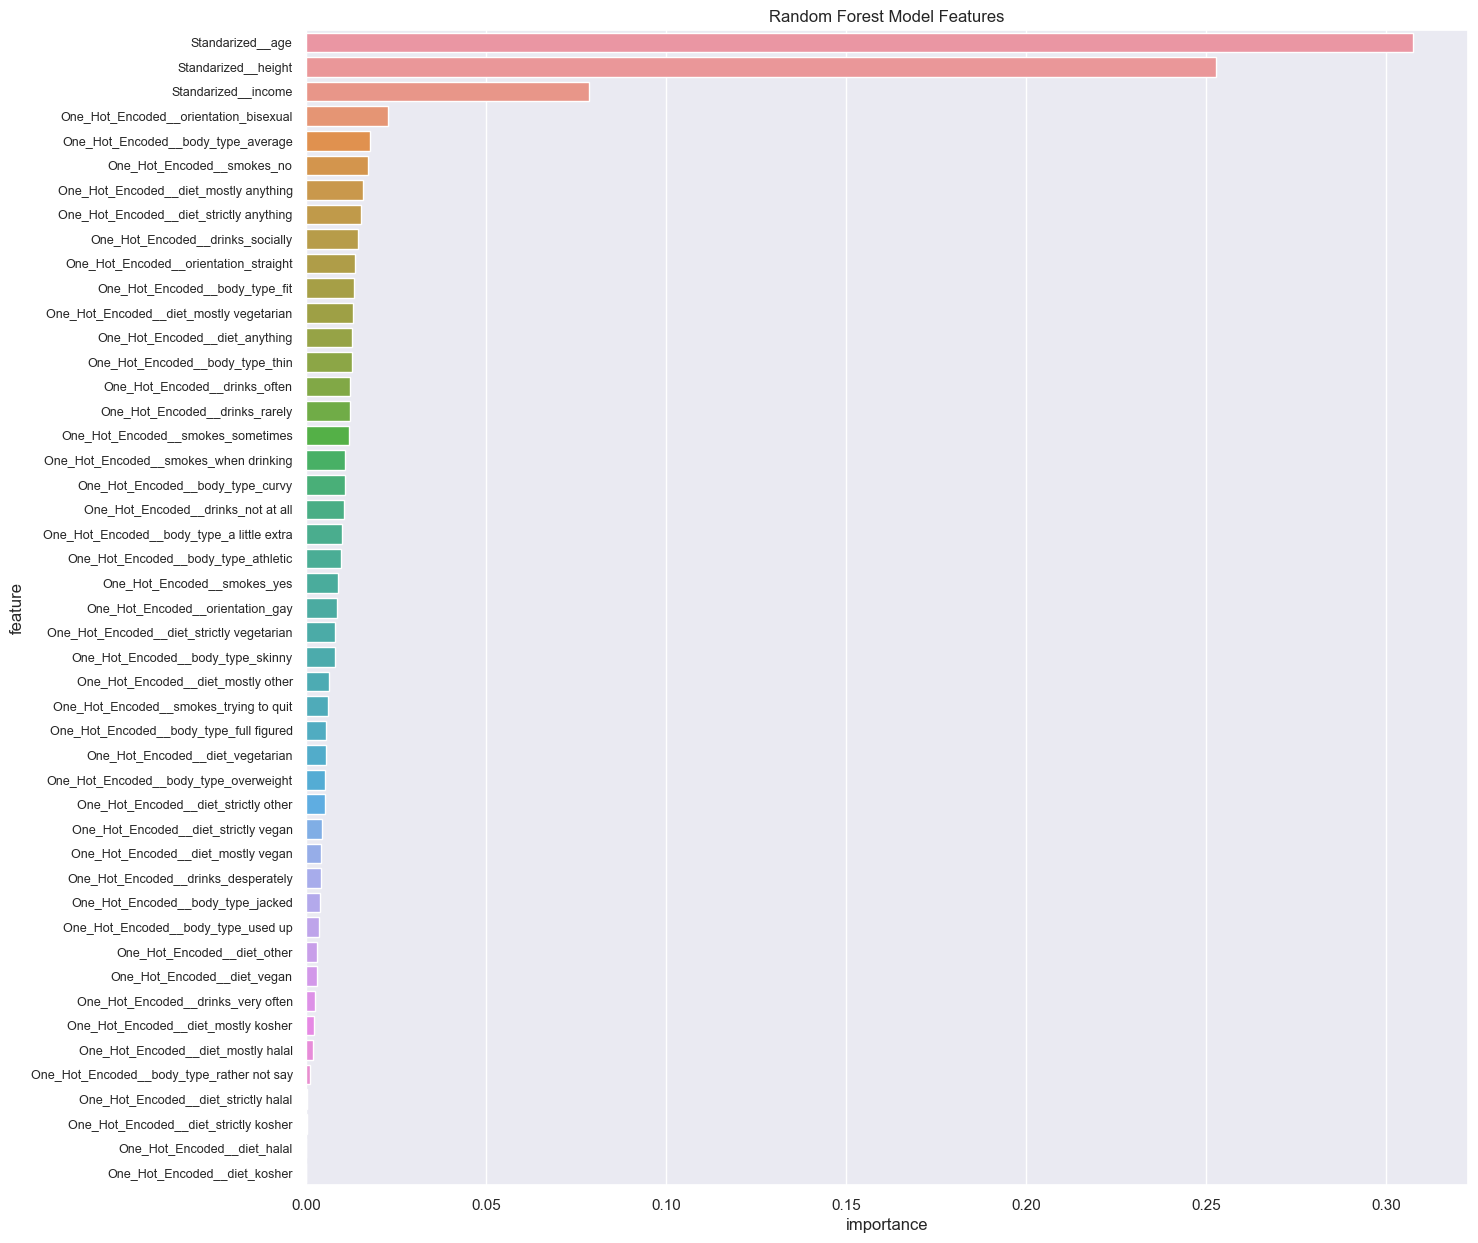

In [36]:
# print the top 5 feautures
importances = pd.DataFrame(zip(ct.get_feature_names_out(),rf.feature_importances_), columns=['feature','importance'])
importances.sort_values(by='importance', ascending=False, inplace=True)
print('The top 5 features of the best random forest model are:')
display(importances.head())

#plot the feature importance
plt.figure(figsize=(15,15))
sn.barplot(x=importances.importance, y=importances.feature)
plt.yticks(fontsize=9)
plt.title('Random Forest Model Features')
plt.show()
plt.close()

- The random forest model predicts the status "single" very well the score of the model is very high. However, this is not the case for the other groups. this can be osberved in the classification report and confusion matrix where the precision and recall for the other labels is quite poor. This is beacuse the label "status" is highly imbalanced. the majority of the profiles have this status and the model is trained with this data therefore the model will "guess" the single variable most of the time and most of the time it will be correct. On the other hand, the model is quite bad at predicting other "status".  
- The imbalance is also observed in the features as well. 


#### **5. Prepare the data**

#### **6. Build the model(s)**

#### **7. Train and Evaluate the model(s)**

#### **8. Conclusions**